#                다변량 데이터의 시각화

### 1. 별그림

In [1]:
setwd("C:/Users/mcm79/R_bio/R_시각화/")
getwd()

[1] "C:/Users/mcm79/R_bio/R_시각화"

아래 옵션을 주지 않으면 제 PC에서 에러메시지가 엄청나게 나와서 아래옵션을 주고 있음.
혹시 이 부분 무슨 말인지 설명해주실분 있을가요?
> options(device = function(file, ...) png('NUL', ...))

In [2]:
options(device = function(file, ...) {png('NUL', ...)})

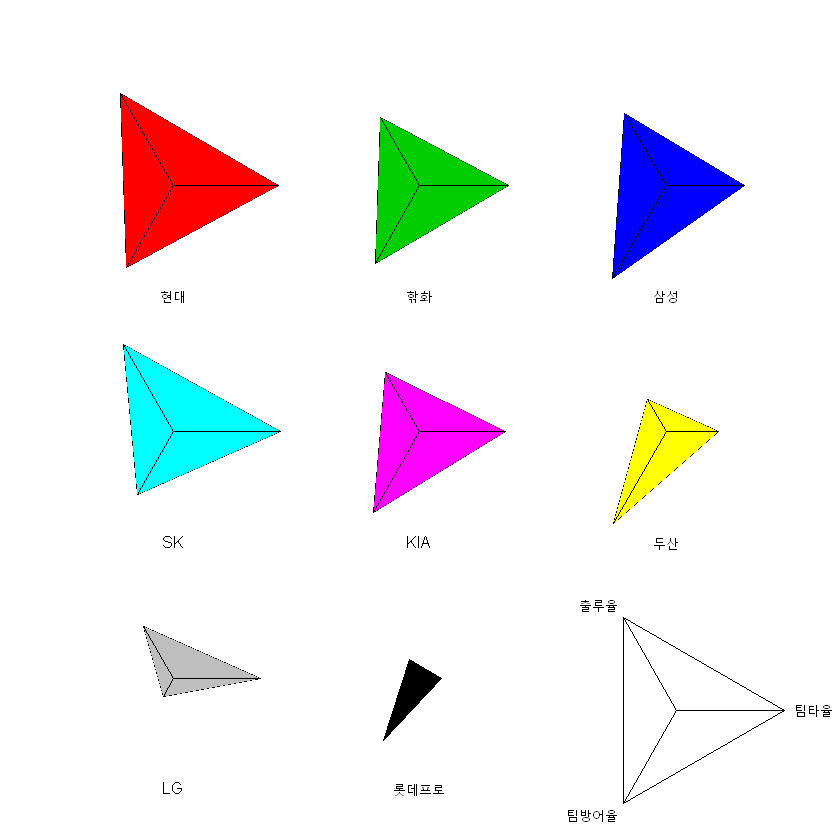

In [4]:
baseball <- read.csv("프로야구20060602.csv", header=T) 
x <- baseball[,2:4] 
x[,1] <- 0.2+0.8*(x[,1]-min(x[,1]))/(max(x[,1])-min(x[,1])) 
x[,2] <- 0.2+0.8*(x[,2]-min(x[,2]))/(max(x[,2])-min(x[,2])) 
x[,3] <- 0.2+0.8*(max(x[,3])-x[,3])/(max(x[,3])-min(x[,3])) 

rownames(x) <- baseball[,1] 
stars(x, scale=F, key.loc = c(7,2), col.stars=2:9)

In [5]:
baseball

,구단,팀타율,출루율,팀방어율
1,현대,0.264,0.347,3.26
2,핚화,0.255,0.329,3.34
3,삼성,0.249,0.332,3.05
4,SK,0.265,0.343,3.63
5,KIA,0.253,0.323,3.29
6,두산,0.235,0.303,3.07
7,LG,0.254,0.317,4.47
8,롯데프로,0.218,0.293,3.63


### 2. 산점도

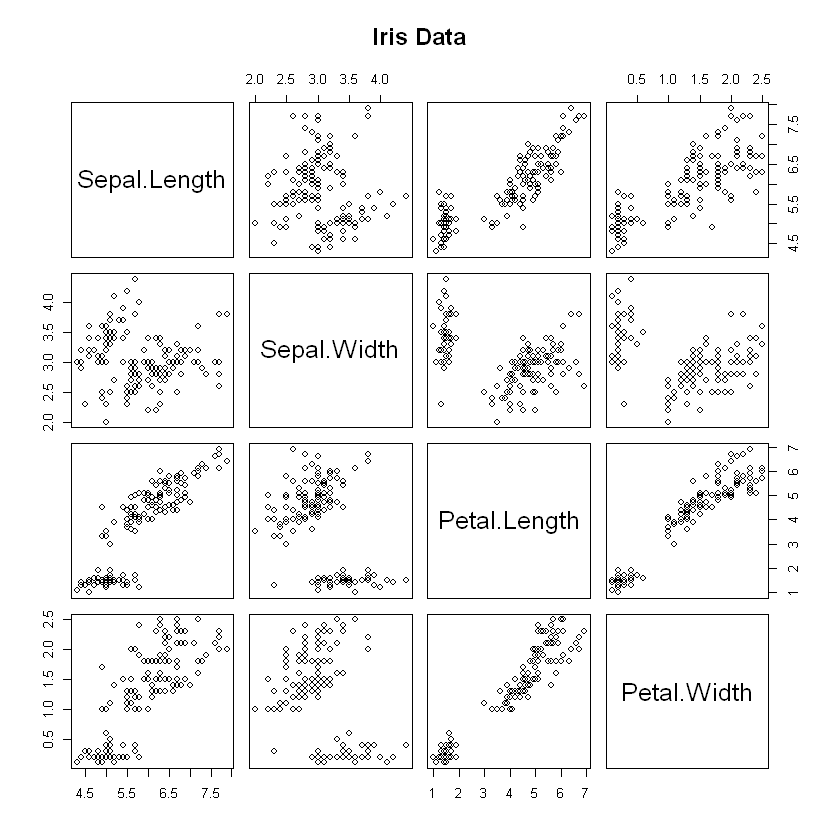

In [31]:
data(iris) 
attach(iris) 
pairs(iris[1:4], main="Iris Data")

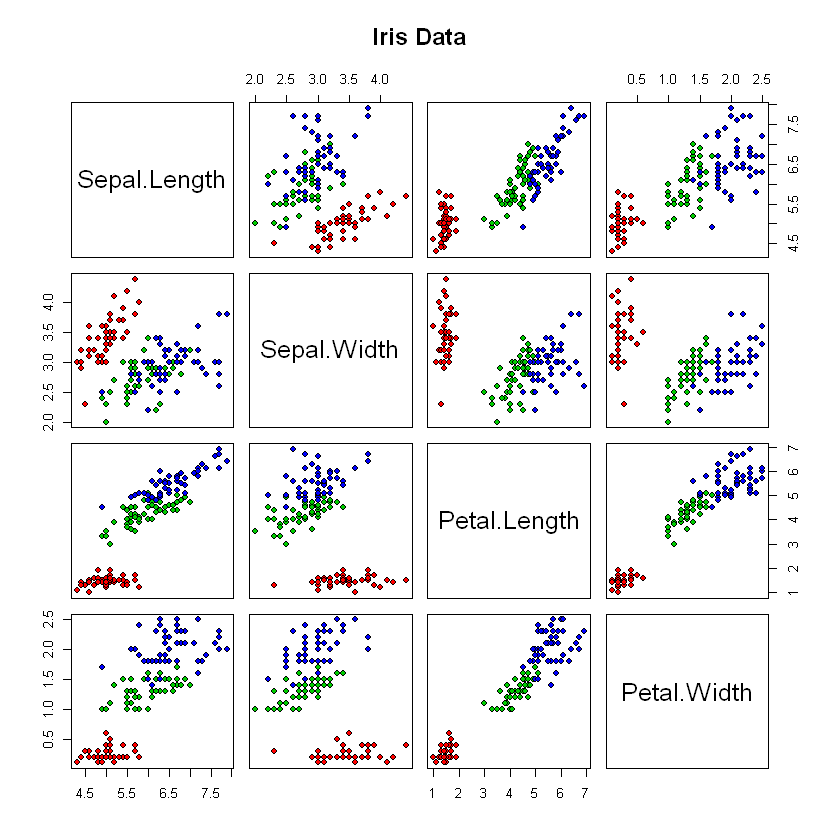

In [32]:
pairs(iris[1:4], main = "Iris Data", pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)])

### 3. 조건부 플롯

In [15]:
detach(quakes)

'data.frame':	1000 obs. of  5 variables:
 $ lat     : num  -20.4 -20.6 -26 -18 -20.4 ...
 $ long    : num  182 181 184 182 182 ...
 $ depth   : int  562 650 42 626 649 195 82 194 211 622 ...
 $ mag     : num  4.8 4.2 5.4 4.1 4 4 4.8 4.4 4.7 4.3 ...
 $ stations: int  41 15 43 19 11 12 43 15 35 19 ...


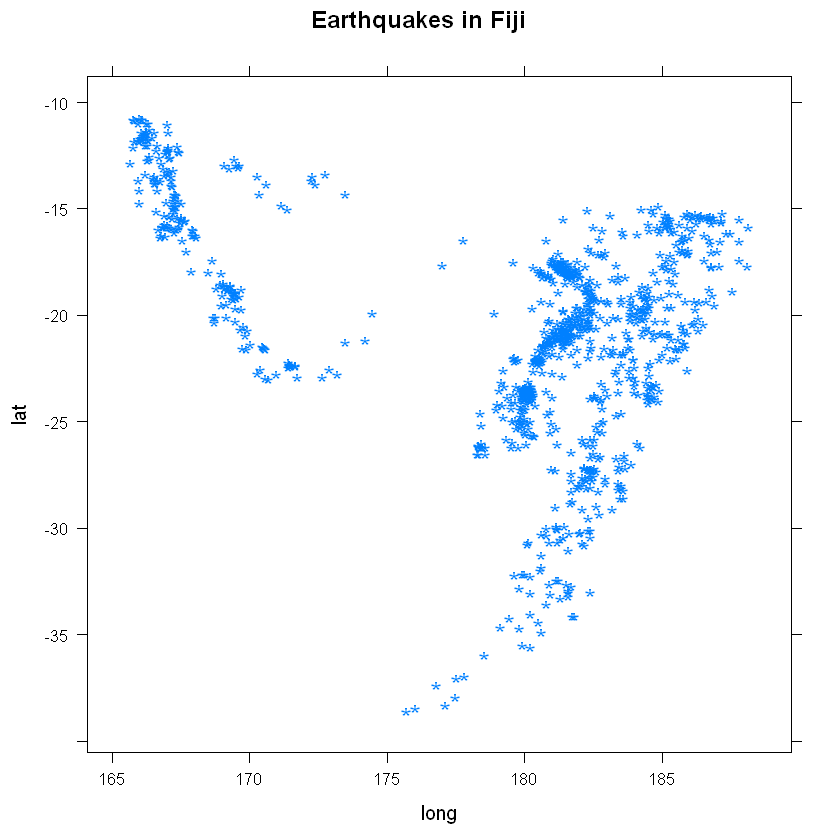

In [14]:
library(lattice) 
data(quakes) 
str(quakes) 
attach(quakes) 
xyplot(lat ~ long, main="Earthquakes in Fiji", pch="*", cex=2)

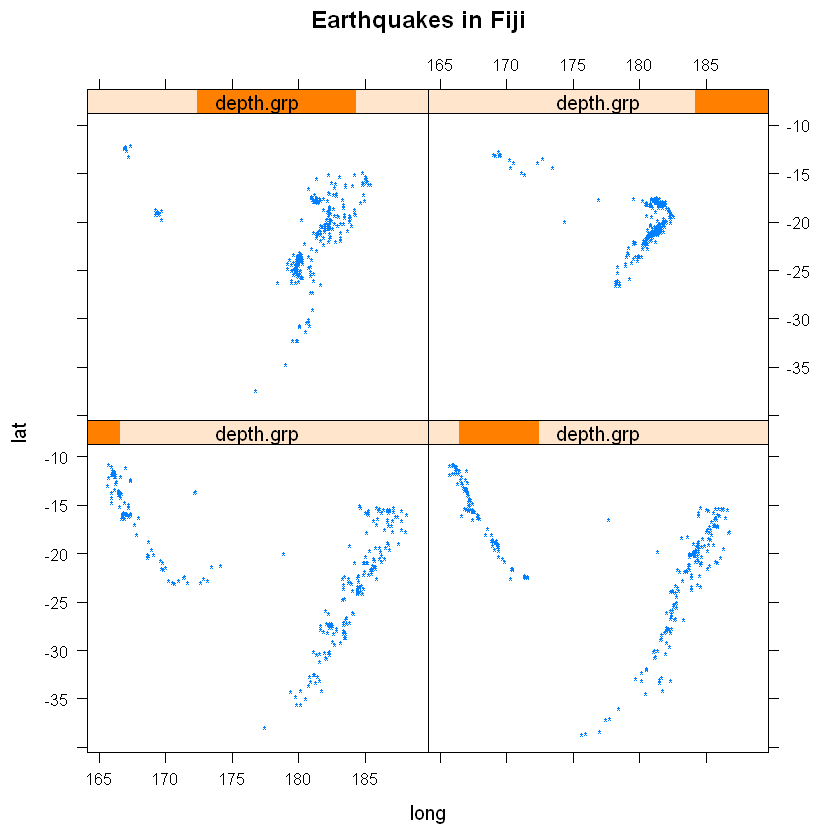

In [115]:
depth.grp <- equal.count(quakes$depth,number=4, overlap=0)
xyplot(lat ~ long | depth.grp, main="Earthquakes in Fiji",pch="*")
#### 아래 명령어를 해주지 않고 재실행하게 되면은 보기싫은 메시지가 나온다.
detach(quakes)

In [60]:
getOption('device')

function(file, ...) png('NUL', ...)

In [59]:
searchpaths()

[1] ".GlobalEnv"                       "quakes"                          
 [3] "C:/Anaconda2/R/library/lattice"   "iris"                            
 [5] "C:/Anaconda2/R/library/stats"     "C:/Anaconda2/R/library/graphics" 
 [7] "C:/Anaconda2/R/library/grDevices" "C:/Anaconda2/R/library/utils"    
 [9] "C:/Anaconda2/R/library/datasets"  "C:/Anaconda2/R/library/methods"  
[11] "Autoloads"                        "C:/Anaconda2/R/library/base"

### 4. 평행좌표 플롯과 변수 순서화

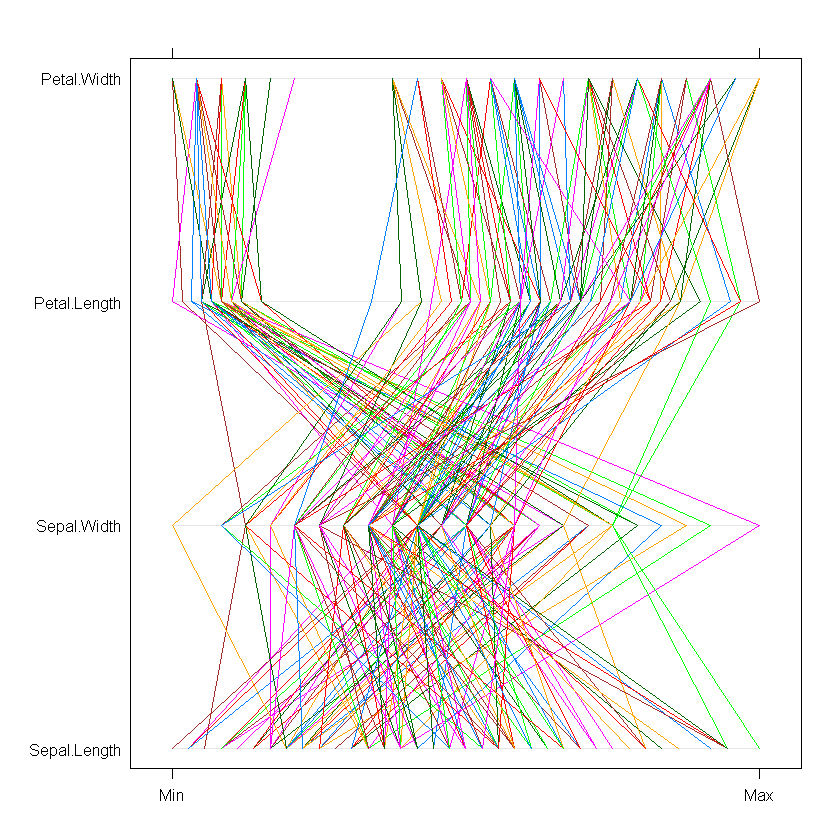

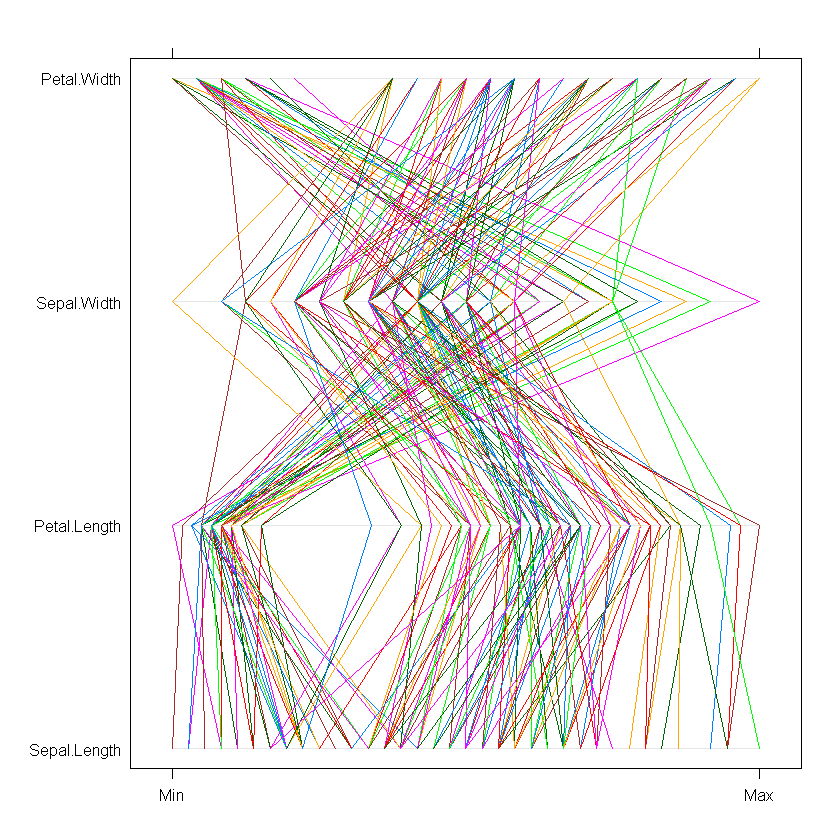

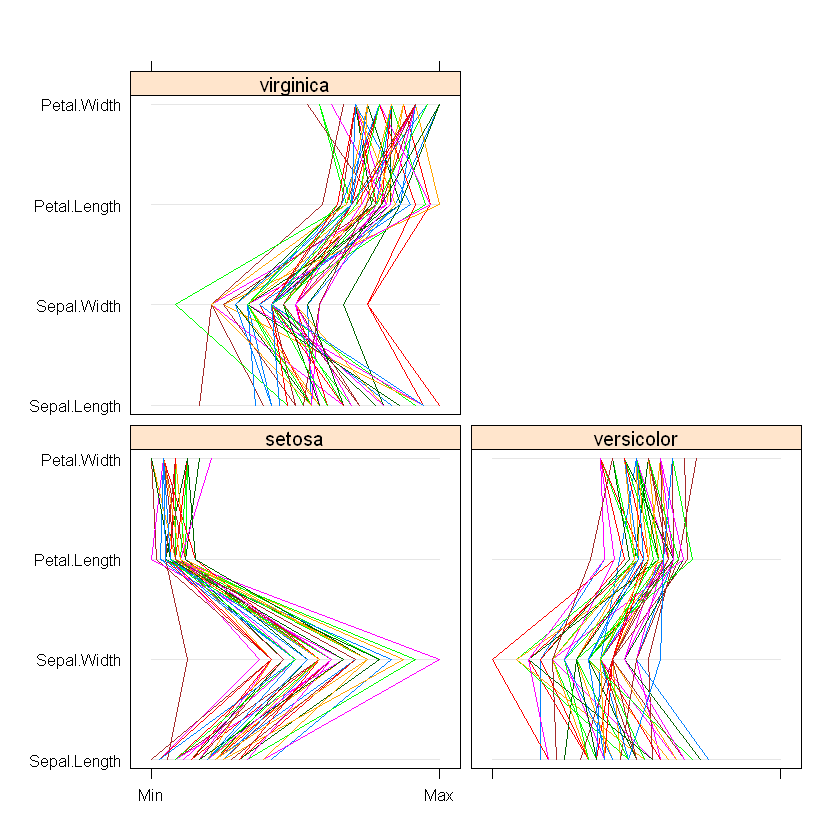

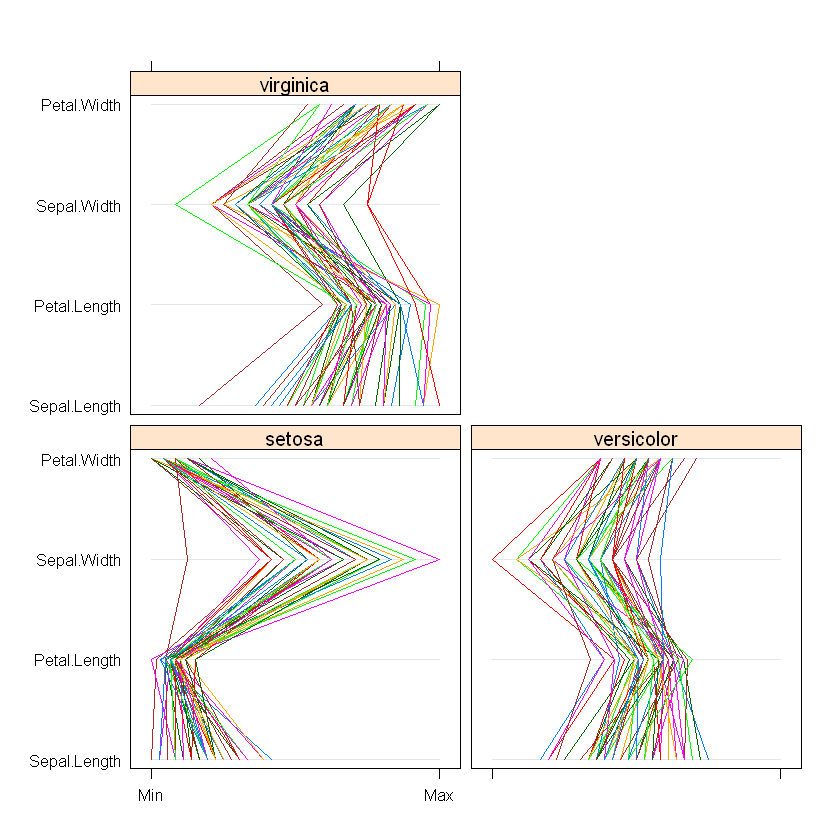

In [68]:
data(iris) 
parallelplot(~iris[,1:4]) 
parallelplot(~iris[,c(1,3,2,4)]) 
parallelplot(~iris[,1:4] | iris$Species)
parallelplot(~iris[,c(1,3,2,4)] | iris$Species)

In [92]:
detach_package <- function(pkg, character.only = FALSE){
    if(!character.only){
        pkg <- deparse(substitute(pkg))
    }
    
    search_item <- paste("package", pkg, sep = ":")
    
    while(search_item %in% search()){
        detach(search_item, unload = TRUE, character.only = TRUE)
    }
}
#detach_package("gclus", TRUE)
#install.packages('gclus',repos='http://cran.us.r-project.org',lib="C:/Anaconda2/R/library")                
#install.packages('gclus',repos='https://cran.rstudio.com',lib="C:/Anaconda2/R/library")


package 'gclus' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mcm79\AppData\Local\Temp\RtmpYXrgFh\downloaded_packages


In [ ]:
# Clustering Graphics을 사용해서 

In [ ]:
round(cor(iris[,1:4]),2)
parallelplot(~iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.00,-0.12,0.87,0.82
Sepal.Width,-0.12,1.00,-0.43,-0.37
Petal.Length,0.87,-0.43,1.00,0.96
Petal.Width,0.82,-0.37,0.96,1.00


[1] 4 3 1 2

,Petal.Width,Petal.Length,Sepal.Length,Sepal.Width
Petal.Width,1.00,0.96,0.82,-0.37
Petal.Length,0.96,1.00,0.87,-0.43
Sepal.Length,0.82,0.87,1.00,-0.12
Sepal.Width,-0.37,-0.43,-0.12,1.00


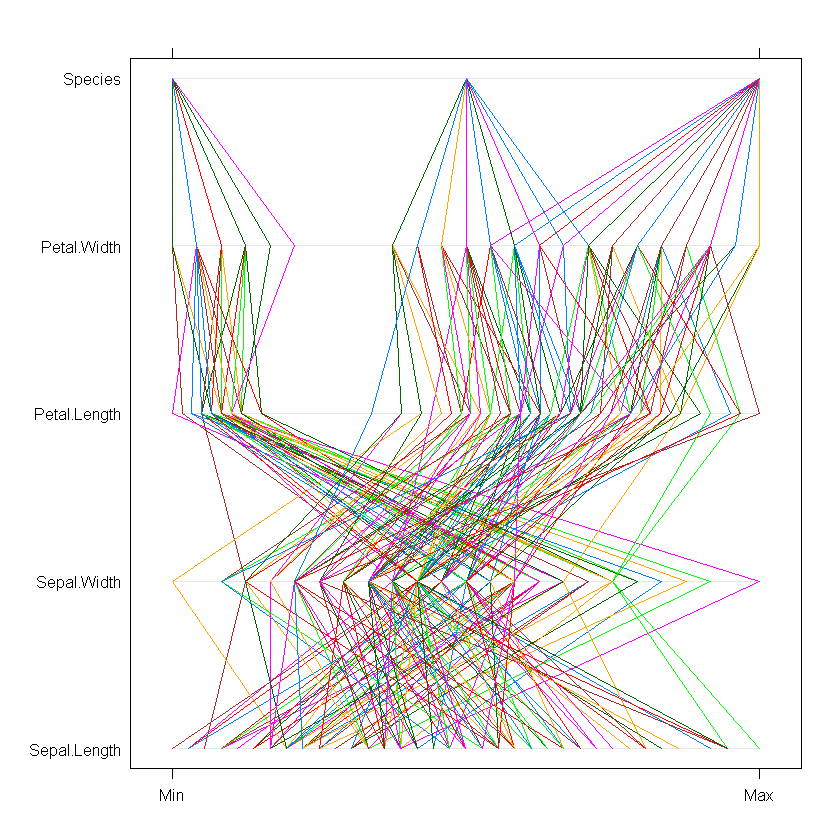

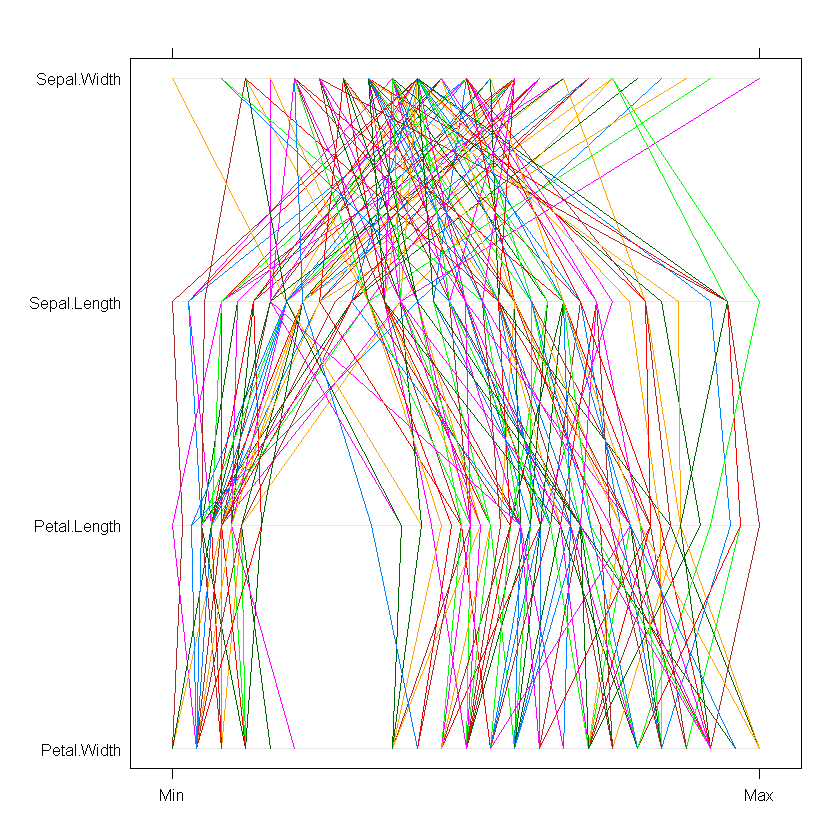

In [112]:
#Clustering Graphics
library(gclus)   


# 유사한 개체 쌍이 인접 되도록 객체를 재정렬. 순열 벡터가 반환된다
order <- order.endlink(cor(iris[,1:4])) 
order 
round(cor(iris[,order]),2) 
parallelplot(~iris[,c(order)])

# 끝잇기 알고리즘(endlink) R 코드: Hurley(2004)

- [0] 개 변수 갂 상관계수 행렬을 산출하여 상관도가 큰 순서대로 변수 쌍을 나열핚다. 예를 들어 6개( ) 변수 자료에서 다음 순서로 변수 쌍이 나열되었다고 하자. 1-5, 4-6, 3-6, 2-6, 1-4, 1-2, 3-4, 4-5, 2-4, 1-6, 5-6, 1-3, 3-5, 2-5, 2-3,
- [1] 가장 상관도가 높은 두 변수를 연결하여 묶는다. 나머지 변수들은 독자적 묶음으로 갂주된다. 예에서, 변수 묶음은 1-5, 2, 3, 4, 6이 된다 (변수 묶음의 수는 5개). 
- [2] 변수 묶음이 1개가 될 때까지, 변수 묶음 양쪽 끝 갂 상관도가 가장 큰 변수 묶음을 찾아 해당 끝을 연결핚다. 예에서, 최우선 연결은 4-6 1-5, 4-6, 2, 3 이 된다.
 다음의 우선 연결은 3-6 (or 6-3)이다. 따라서 변수 묶음은 이 된다.
- [3] 다음의 우선 연결은 3-6 (or 6-3)이다. 따라서 변수 묶음은 1-5, 4-6-3, 2 다음 우선 연결은 2-6이지만 6은 변수 묶음의 끝에 있지 않다. 따라서 부적합하다. 다음 우선 연결은 1-4이다. 따라서 변수 묶음은 5-1-4-6-3, 2 다음 우선 연결은 1-2이지만 1이 변수 묶음의 끝에 있지 않으므로 부적합. 이어지는 우선 연결 3-4, 4-5, 2-4, 1-6, 5-6, 1-3, 3-5도 마찬가지로 적합하지 않다.
- 다음 우선 연결 2-5는 적합하다. 이에 따라 변수 묶음은 2-5-1-4-6-3 이 된다 (or 3-6-4-1-5-2). 모든 변수들이 연결되었으므로 끝.

### 5. 주성분분석 차트

> 회귀분석이나 의사결정나무(decision tree) 등의 모형 개발 시 입력변수들간의 상관관계가 높은 다중공선성(multicollinearity)이 존재할 경우 모형이 잘못만들어지고 따라서 해석에도 문제가 생기게 됩니다.  다중공선성이 존재할 경우 해결 방법 중의 하나가 바로 상관도가 높은 변수들을 하나의 주성분 혹은 요인으로 축소하여 모형개발에 활용하는 것입니다

In [120]:
secu_com_finance_2007 <- read.csv("secu_com_finance_2007.csv",header = TRUE, stringsAsFactors = FALSE)
secu_com_finance_2007

,company,V1,V2,V3,V4,V5
1,SK증권,2.43,11.1,18.46,441.67,0.9
2,교보증권,3.09,9.95,29.46,239.43,0.9
3,대신증권,2.22,6.86,28.62,249.36,0.69
4,대우증권,5.76,23.19,23.47,326.09,1.43
5,동부증권,1.6,5.64,25.64,289.98,1.42
6,메리츠증권,3.53,10.64,32.25,210.1,1.17
7,미래에셋증권,4.26,15.56,24.4,309.78,0.81
8,부국증권,3.86,5.5,70.74,41.36,0.81
9,브릿지증권,4.09,6.44,64.38,55.32,0.32
10,삼성증권,2.73,10.68,24.41,309.59,0.64


> - V1 : 총자본순이익율
> - V2 : 자기자본순이익율
> - V3 : 자기자본비율
> - V4 : 부채비율
> - V5 : 자기자본회전율

In [121]:
# 표준화 변환 (standardization)
 secu_com_finance_2007 <- transform(secu_com_finance_2007, V1_s = scale(V1), 
V2_s = scale(V2), V3_s = scale(V3), V4_s = scale(V4), V5_s = scale(V5))

In [123]:
# 부채비율(V4_s)을 방향(max(V4_s)-V4_s) 변환
secu_com_finance_2007 <- transform(secu_com_finance_2007, V4_s2 = max(V4_s) - V4_s)
 
# variable selection
secu_com_finance_2007_2 <- secu_com_finance_2007[,c("company", "V1_s", "V2_s", "V3_s", "V4_s2", "V5_s")]

# Correlation analysis
cor(secu_com_finance_2007_2[,-1])

round(cor(secu_com_finance_2007_2[,-1]), digits=3) # 반올림

,V1_s,V2_s,V3_s,V4_s2,V5_s
V1_s,1.00000000,0.61651527,0.32397800,0.35539305,0.01387883
V2_s,0.6165153,1.0000000,-0.5124351,-0.4659444,0.4226346
V3_s,0.3239780,-0.5124351,1.0000000,0.9366296,-0.5634078
V4_s2,0.3553930,-0.4659444,0.9366296,1.0000000,-0.5395457
V5_s,0.01387883,0.42263462,-0.56340782,-0.53954570,1.00000000


,V1_s,V2_s,V3_s,V4_s2,V5_s
V1_s,1.000,0.617,0.324,0.355,0.014
V2_s,0.617,1.000,-0.512,-0.466,0.423
V3_s,0.324,-0.512,1.000,0.937,-0.563
V4_s2,0.355,-0.466,0.937,1.000,-0.540
V5_s,0.014,0.423,-0.563,-0.540,1.000


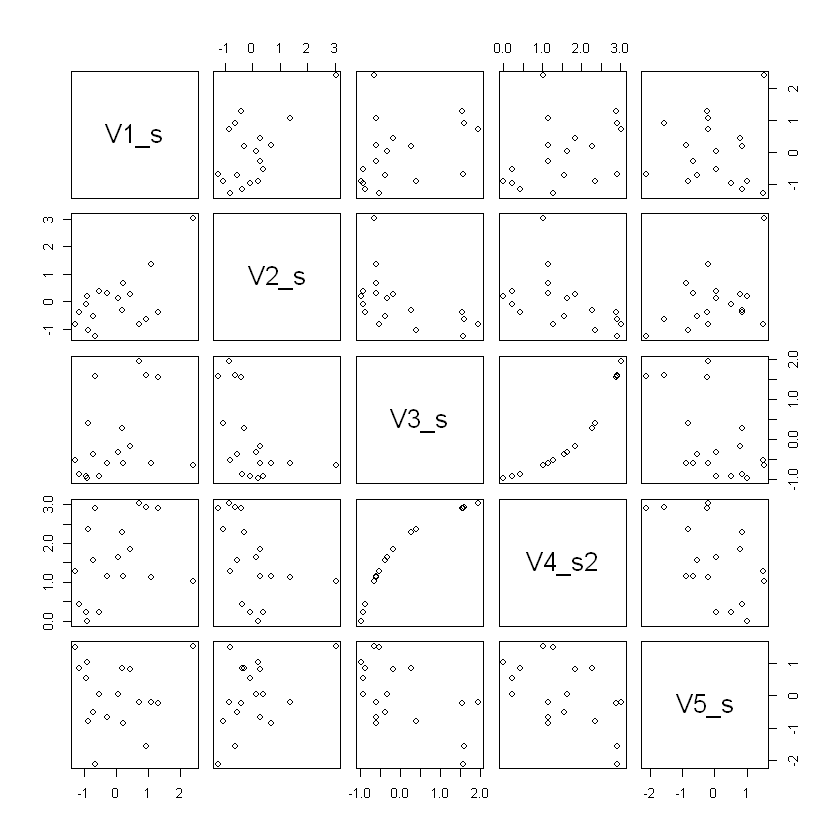

In [124]:
# Scatter plot matrix
plot(secu_com_finance_2007_2[,-1])

In [126]:
# 주성분분석 PCA(Principal Component Analysis)
secu_prcomp <- prcomp(secu_com_finance_2007_2[,c(2:6)]) # 첫번째 변수 회사명은 빼고 분석
summary(secu_prcomp)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5
Standard deviation     1.6618 1.2671 0.7420 0.25311 0.13512
Proportion of Variance 0.5523 0.3211 0.1101 0.01281 0.00365
Cumulative Proportion  0.5523 0.8734 0.9835 0.99635 1.00000

In [127]:
print(secu_prcomp)

Standard deviations:
[1] 1.6617648 1.2671437 0.7419994 0.2531070 0.1351235

Rotation:
              PC1         PC2           PC3          PC4         PC5
V1_s   0.07608427 -0.77966993  0.0008915975 -0.140755404  0.60540325
V2_s  -0.39463007 -0.56541218 -0.2953216494  0.117644166 -0.65078503
V3_s   0.56970191 -0.16228156  0.2412221065 -0.637721889 -0.42921686
V4_s2  0.55982770 -0.19654293  0.2565972887  0.748094314 -0.14992183
V5_s  -0.44778451 -0.08636803  0.8881182665 -0.003668418 -0.05711464


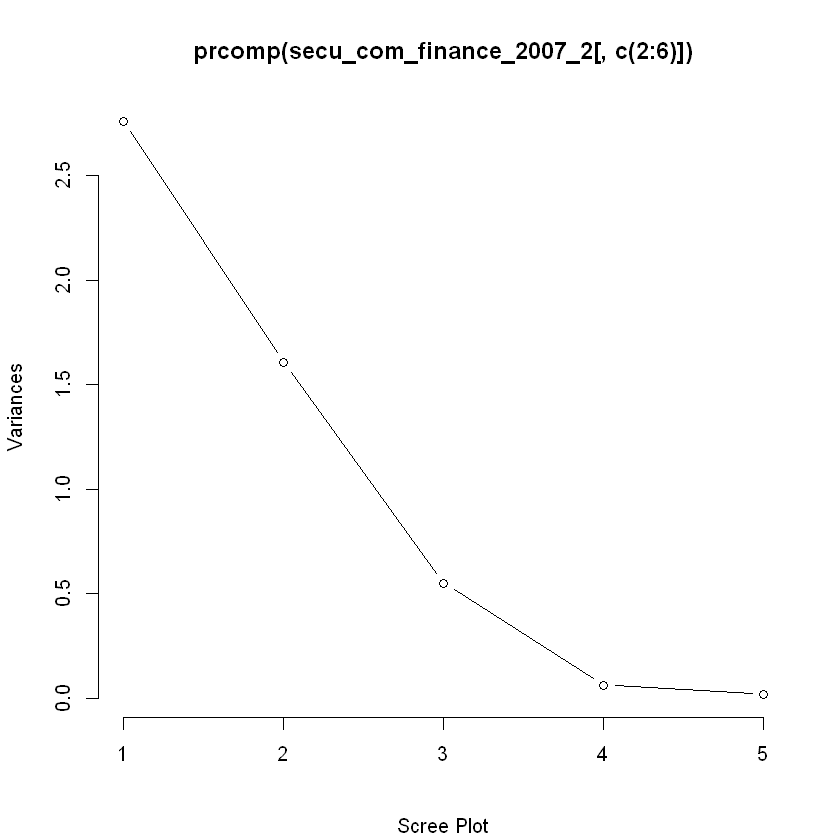

In [128]:
plot(prcomp(secu_com_finance_2007_2[,c(2:6)]), type="l", sub = "Scree Plot")

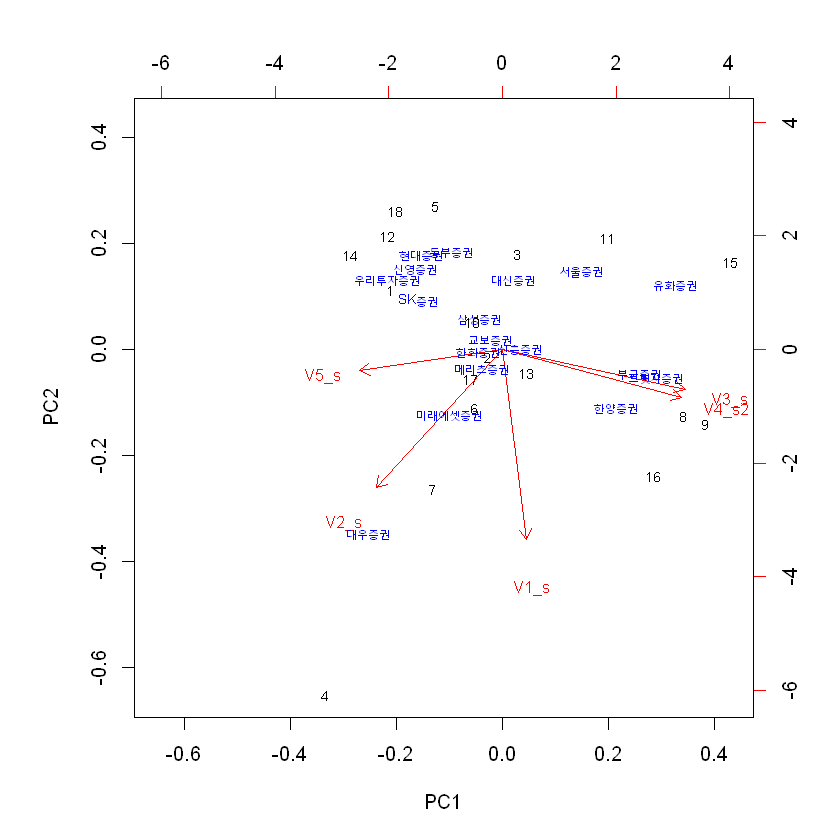

In [130]:
# Biplot
biplot(prcomp(secu_com_finance_2007_2[,c(2:6)]), cex = c(0.7, 0.8))

# 관측치별 주성분1, 주성분2 점수 계산(PC1 score, PC2 score)
secu_pc1 <- predict(secu_prcomp)[,1]
secu_pc2 <- predict(secu_prcomp)[,2]

# 관측치별 이름 매핑(rownames mapping)
text(secu_pc1, secu_pc2, labels = secu_com_finance_2007_2$company,cex = 0.7, pos = 3, col = "blue")

### 6. 공간자료의 표현

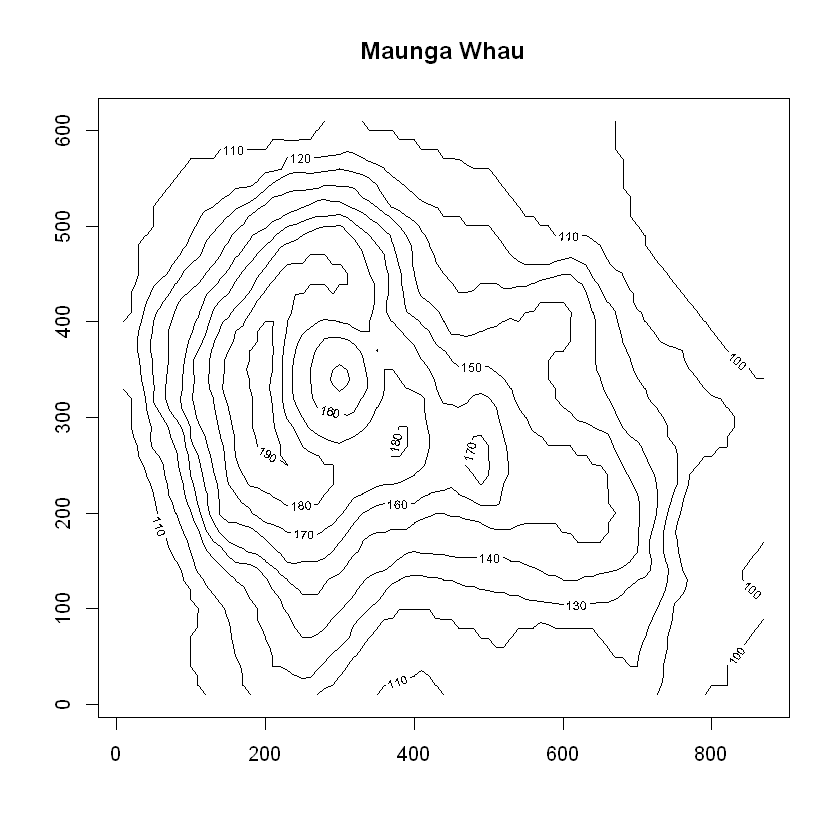

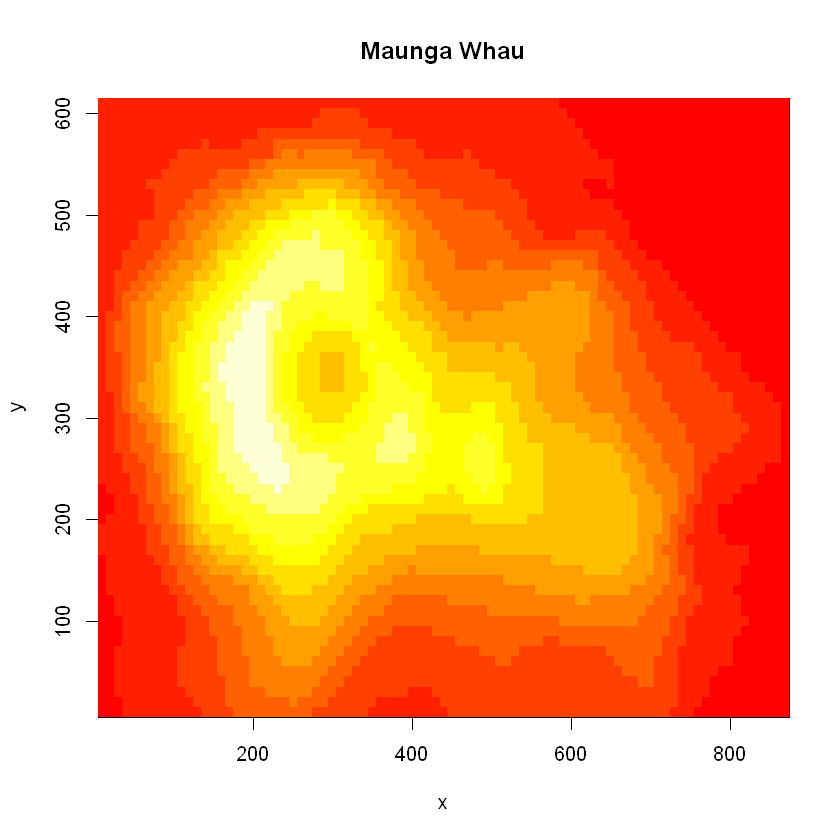

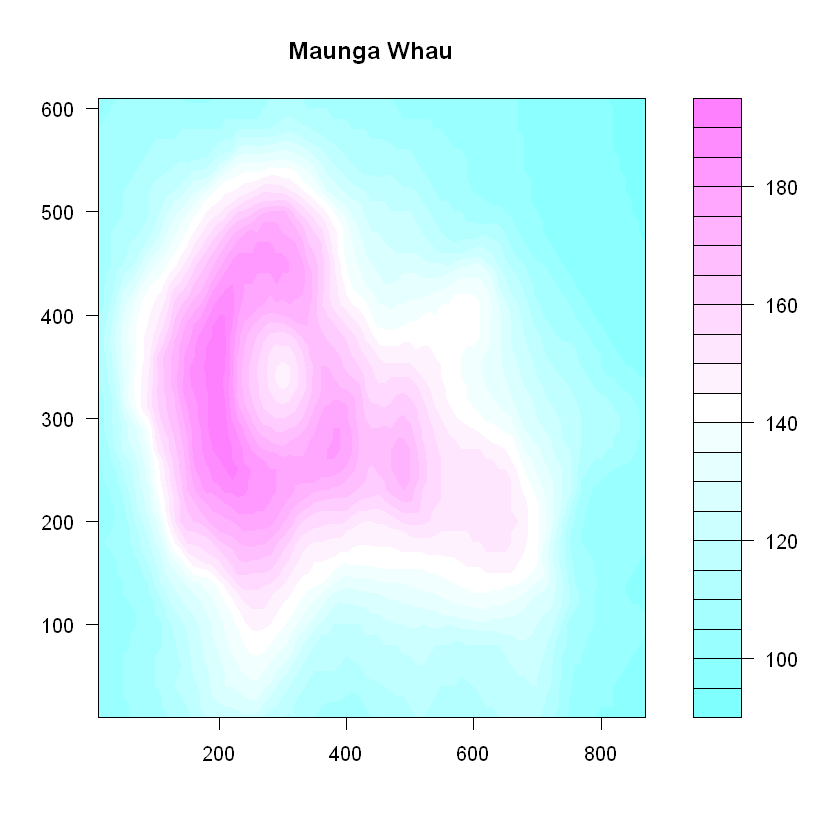

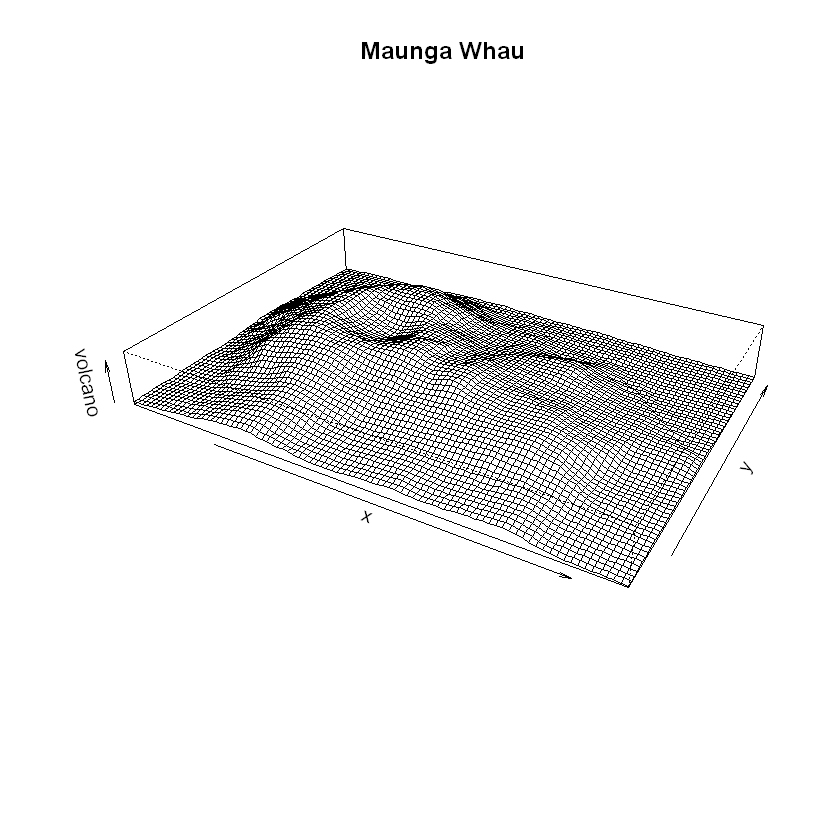

In [99]:
x <- 10*(1:87); 
y <- 10*(1:61) 
contour(x,y,volcano,main="Maunga Whau") 
image(x,y,volcano,main="Maunga Whau") 
filled.contour(x,y,volcano,main="Maunga Whau") 

persp(x, y, volcano,phi=30,theta=30,scale=F,main="Maunga Whau")

In [131]:
volcano

100,100,101,101,101,101,101,100,100,100,...,107,107,107,106,106,105,105,104,104,103
101,101,102,102,102,102,102,101,101,101,...,108,108,107,107,106,106,105,105,104,104
102,102,103,103,103,103,103,102,102,102,...,109,108,108,107,107,106,106,105,105,104
103,103,104,104,104,104,104,103,103,103,...,109,109,108,108,107,107,106,106,105,105
104,104,105,105,105,105,105,104,104,103,...,110,109,109,108,107,107,107,106,106,105
105,105,105,106,106,106,106,105,105,104,...,110,110,109,108,108,108,107,107,106,106
105,106,106,107,107,107,107,106,106,105,...,110,111,110,109,109,108,108,107,107,106
106,107,107,108,108,108,108,107,107,106,...,113,112,110,110,109,109,108,108,107,106
107,108,108,109,109,109,109,108,108,107,...,115,114,112,110,110,109,109,108,107,107
108,109,109,110,110,110,110,109,109,108,...,117,115,113,111,110,110,109,108,107,107
109,110,110,111,111,111,111,110,110,110,...,118,116,114,112,111,110,109,108,107,106


In [107]:
data(state)
state.m <- colpairs(state.x77,function(x,y){
    cor.test(x,y,"two.sided","kendall")$estimate
    }, diag=1
)